In [6]:
import cv2

In [7]:
import tensorflow as tf
tf.__version__


'1.5.0'

In [8]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from PIL import Image
from numpy import *
from pathlib import Path

In [9]:
import os
from keras_preprocessing import image
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils

Using TensorFlow backend.


In [10]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
path1 = Path("/Users/chhavi/Documents/220/Assignment/train")
path2 = Path("/Users/chhavi/Documents/220/Assignment/input")

In [12]:
listing = os.listdir(path1)
sample_size = size(listing) -1
print(sample_size)

41


In [13]:
img_rows, img_cols = 200, 200
for file in listing:
    if file == '.DS_Store':
        continue
    im = Image.open(str(path1) + '/' + file)
    img = im.resize((200,200))
    gray = img.convert('L')
    
    gray.save(str(path2) + '/' + file)

In [14]:
image = os.listdir(path2)

In [15]:
image1 = array(Image.open(str(path2) + "/" + image[0]))
m,n = image1.shape[0:2]
image_len = len(image)
print(m,n,image_len)

200 200 41


In [16]:
imatrix = array([array(Image.open(str(path2) + "/" + i)).flatten()
                for i in image],'f')

In [17]:
label = np.ones((sample_size,),dtype=int)
label[0:20]=0
label[21:40]=1

In [18]:
data, Label = shuffle(imatrix,label,random_state=2)
train_data = [data,Label]

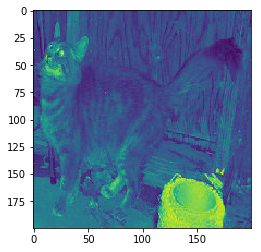

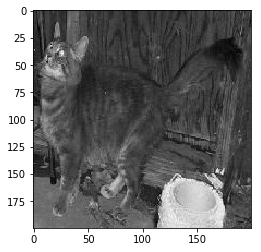

(41, 40000)
(41,)


In [19]:
img= imatrix[15].reshape(img_cols,img_rows)
plt.imshow(img)
plt.show()
plt.imshow(img, cmap = 'gray')
plt.show()
print(train_data[0].shape)
print(train_data[1].shape)

In [20]:
batch_size = 8
epochs = 20
channels = 1
conv = 3
maxpool = 2
filters = 32
classes = 2

In [21]:
(X,y) = (train_data[0],train_data[1])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

X_train = X_train.reshape(X_train.shape[0],1, img_cols,img_rows)
X_test = X_test.reshape(X_test.shape[0],1,img_cols,img_rows)


In [22]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [23]:
X_train /= 255
X_test /= 255

In [24]:
print(X_train.shape)
print(X_train.shape[0], 'train_samples')
print(X_test.shape[0], 'test_samples')

(32, 1, 200, 200)
32 train_samples
9 test_samples


In [25]:
Y_train = np_utils.to_categorical(y_train,classes)
Y_test = np_utils.to_categorical(y_test,classes)

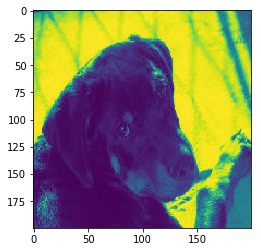

In [26]:
i=2
plt.imshow(X_train[i, 0], interpolation='nearest')
plt.show()

In [27]:
print ('label: ',Y_train[i,:])

label:  [ 1.  0.]


In [28]:
model = Sequential() 
model.add(Convolution2D(filters,(conv,conv),border_mode='valid',input_shape=(1,img_cols,img_rows),data_format='channels_first'))
convout1=Activation('relu')
model.add(convout1)
model.add(Convolution2D(filters,conv,conv))
convout2=Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size= (maxpool, maxpool)))
model.add(Dropout(0.25))


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 200, 2..., data_format="channels_first", padding="valid")`
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """


In [29]:

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 198, 198)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 198, 198)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 196, 32)       57056     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 196, 32)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 98, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 98, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 47040)             0         
__________

In [30]:
model.fit(X_train,Y_train,batch_size=batch_size,nb_epoch=epochs, 
          verbose=1,validation_data=(X_test,Y_test))


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 32 samples, validate on 9 samples
Epoch 1/20
32/32 [==============================] - 6s 196ms/step - loss: 1.9512 - acc: 0.4062 - val_loss: 0.7036 - val_acc: 0.4444
Epoch 2/20
32/32 [==============================] - 6s 179ms/step - loss: 0.6713 - acc: 0.5625 - val_loss: 0.6872 - val_acc: 0.4444
Epoch 3/20
32/32 [==============================] - 5s 153ms/step - loss: 0.6691 - acc: 0.5625 - val_loss: 0.6921 - val_acc: 0.6667
Epoch 4/20
32/32 [==============================] - 5s 161ms/step - loss: 0.6668 - acc: 0.6875 - val_loss: 0.7439 - val_acc: 0.5556
Epoch 5/20
32/32 [==============================] - 6s 190ms/step - loss: 0.6245 - acc: 0.5938 - val_loss: 0.7353 - val_acc: 0.6667
Epoch 6/20
32/32 [==============================] - 6s 184ms/step - loss: 0.5840 - acc: 0.7188 - val_loss: 0.7433 - val_acc: 0.6667
Epoch 7/20
32/32 [==============================] - 6s 182ms/step - loss: 0.5193 - acc: 0.7500 - val_loss: 0.8555 - val_acc: 0.6667
Epoch 8/20
32/32 [===============

In [31]:
model.fit(X_train,Y_train,batch_size=batch_size,nb_epoch=epochs,
          verbose=1,validation_split=0.2)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 25 samples, validate on 7 samples
Epoch 1/20
25/25 [==============================] - 4s 164ms/step - loss: 0.0673 - acc: 0.9600 - val_loss: 0.3469 - val_acc: 0.8571
Epoch 2/20


KeyboardInterrupt: 

In [32]:
score = model.evaluate(X_test,Y_test,verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

Test score:  2.05960321426
Test accuracy:  0.666666686535


In [33]:
print(model.predict_classes(X_test[1:6]))
print(Y_test[1:6])

[1 0 1 1 0]
[[ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]]
